![data-x](http://oi64.tinypic.com/o858n4.jpg)


# Intro to Deep Learning with Keras

#### Author: Alexander Fred Ojala & Ikhlaq Sidhu

_____

# Why Keras
Modular, powerful and intuitive Deep Learning python library built on TensorFlow, CNTK, Theano.
* Minimalist, user-friendly interface
* CPUs and GPUs
* Open-source, developed and maintained by a community of contributors, and
publicly hosted on github
* Extremely well documented, lots of working examples: https://keras.io/
* Very shallow learning curve —> it is by far one of the best tools for both beginners and experts

# High level wrappers
Compile code down to the deep learning framework (i.e. takes longer to run). See comparison of speed for different DL frameworks:

<img src='imgs/train_times.png' width=600></img>

In [1]:
# Suppress TensorFlow and Keras warnings for cleaner output
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import keras

Using TensorFlow backend.


# Keras backend

We want Keras to use Tensorflow as a backend. If the warning above does not say:

<div class='alert alert-danger'>**Using TensorFlow backend.**</div>

Then open up the keras configuration file located in:

`$HOME/.keras/keras.json` 

(On Windows replace `$HOME` with `%USERPROFILE%`)

and change the entries in the JSON file to:

```json
{
    "floatx": "float32",
    "epsilon": 1e-07,
    "backend": "tensorflow",
    "image_data_format": "channels_last"
}
```

After that restart your Kernel and run the code again.

# Keras "Hello World" on Iris

### Data preprocessing

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

data = datasets.load_iris()

In [4]:
print(data.DESCR[:980])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ===================


In [5]:
x = data['data']
y = data['target']

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# one hot encode y
import pandas as pd

y = pd.get_dummies(y).values
y[:5,:]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [9]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, test_size=0.4,
                                                    random_state=1337,
                                                   shuffle=True)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(90, 4)
(90, 3)
(60, 4)


### The Sequential model
The simplest model in Keras is the Sequential model, a linear stack of layers.

* **Sequential model** linear stack of layers: It allows us to build NNs like legos, by adding one layer on top of the other, swapping layers in and out

* Graph: multi-input, multi-output, with arbitrary connections inside

In [11]:
# Core data structure in Keras is a model
# The model is an object in which we organize layers

In [12]:
# model initialization
from keras.models import Sequential

model = Sequential() # instantiate empty Sequential model

We can import layer classes and stack layers (in an NN model for example), by using `.add()`

# Specifying the input shape

The model needs to know what input shape it should expect. For this reason, the first layer in a  Sequential model needs to receive information about its input shape. There are several possible ways to do this:

* Pass an input_shape argument to the first layer. This is a shape tuple (a tuple of integers or None entries, where None indicates that any positive integer may be expected).
* Some 2D layers, such as Dense, support the specification of their input shape via the argument  input_dim, and some 3D temporal layers support the arguments input_dim and input_length.


* **The following snippets are strictly equivalent:**
* model.add(Dense(32, input_shape=(784,)))
* model.add(Dense(32, input_dim=784))

# Construction Phase

In [13]:
# model contruction (architecture build computational graph)
from keras.layers import Dense

model.add( Dense(units=64, activation='relu', input_shape=(4,) ))
model.add( Dense(units=3, activation='softmax') )

# Compilation phase, specify learning process

Run `.compile()` on the model to specify learning process.

Before training a model, you need to configure the learning process, which is done via the  compile method. It receives three arguments:

* **An optimizer:** This could be the string identifier of an existing optimizer (such as rmsprop or adagrad), or an instance of the Optimizer class.
* **A loss function:** This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or mse), or it can be an objective function.
* **(Optional) A list of metrics:** For any classification problem you will want to set this to metrics=['accuracy']. A metric could be the string identifier of an existing metric or a custom metric function.

In [14]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

## We can also specify our own optimizer or loss function

```python
# or with we can specify loss function

from keras.optimizers import SGD

model.compile(loss = 'categorical_crossentropy',
             optimizer = SGD(lr=0.001, momentum = 0.9, nesterov=True),
             metrics = ['accuracy'])
```

### Different optimizers and their trade-offs
To read more about gradient descent optimizers, hyperparameters etc. This is a recommended reading: http://ruder.io/optimizing-gradient-descent/index.html

### Training
Keras models are trained on Numpy arrays of input data and labels. For training a model, you will typically use the fit function.

In [15]:
# Fit the model by iterating over the training data in batches

model.fit(X_train, y_train, epochs = 50, batch_size= 32)

Epoch 1/50
90/90 [==============================] - 0s 3ms/step - loss: 1.5299 - acc: 0.2667
Epoch 2/50
90/90 [==============================] - 0s 112us/step - loss: 1.3058 - acc: 0.2667
Epoch 3/50
90/90 [==============================] - 0s 153us/step - loss: 1.1569 - acc: 0.2667
Epoch 4/50
90/90 [==============================] - 0s 212us/step - loss: 1.0467 - acc: 0.5889
Epoch 5/50
90/90 [==============================] - 0s 390us/step - loss: 0.9817 - acc: 0.6111
Epoch 6/50
90/90 [==============================] - 0s 428us/step - loss: 0.9397 - acc: 0.3778
Epoch 7/50
90/90 [==============================] - 0s 374us/step - loss: 0.9124 - acc: 0.1333
Epoch 8/50
90/90 [==============================] - 0s 348us/step - loss: 0.8917 - acc: 0.1556
Epoch 9/50
90/90 [==============================] - 0s 403us/step - loss: 0.8729 - acc: 0.2889
Epoch 10/50
90/90 [==============================] - 0s 459us/step - loss: 0.8566 - acc: 0.4667
Epoch 11/50
90/90 [==============================] 

In [16]:
# # Evaluate the model Accuracy on test set
model.evaluate(X_test, y_test, batch_size=60,verbose=False)[1]

0.9666666388511658

In [17]:
# Predictions on new data:

class_probabilities = model.predict(X_test, batch_size=128)

# gives output of the softmax function

In [18]:
class_probabilities[:5,:]

array([[0.08671617, 0.50276315, 0.41052073],
       [0.8398964 , 0.11209006, 0.04801363],
       [0.0219885 , 0.40420935, 0.5738022 ],
       [0.77496237, 0.15529333, 0.06974428],
       [0.01476524, 0.37532917, 0.60990566]], dtype=float32)

# Keras DNN on MNIST

Data preprocessing

In [19]:
# Load MNIST data
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_dim = 28*28
num_classes = 10

X_train = X_train.reshape(X_train.shape[0], img_dim)
X_test = X_test.reshape(X_test.shape[0], 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [20]:
# Sequential model to stack layers

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

# Model contruction

In [21]:
# Initialize model constructor
model = Sequential()
# Add layers sequentially
model.add(Dense(300, activation=tf.nn.leaky_relu, input_shape=(784,) ) )
model.add(Dropout(.1))

# Second..
model.add(Dense(200, activation=tf.nn.leaky_relu))
model.add(Dropout(.1))

# Third..
model.add(Dense(100, activation=tf.nn.leaky_relu))
model.add(Dropout(.1))

model.add(Dense(10, activation='softmax'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               60200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total para

In [23]:
# For a multi-class classification problem
model.compile(optimizer='adam', #chooses suitable learning rate for you.
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
history = model.fit(X_train, y_train, epochs=4, batch_size=128,
                   verbose=True)

Epoch 1/4
60000/60000 [==============================] - 17s 287us/step - loss: 0.3039 - acc: 0.9087
Epoch 2/4
60000/60000 [==============================] - 18s 303us/step - loss: 0.1297 - acc: 0.9604
Epoch 3/4
60000/60000 [==============================] - 18s 308us/step - loss: 0.0983 - acc: 0.9697
Epoch 4/4
60000/60000 [==============================] - 20s 332us/step - loss: 0.0797 - acc: 0.9752


In [25]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08236757314146961
Test accuracy: 0.9747


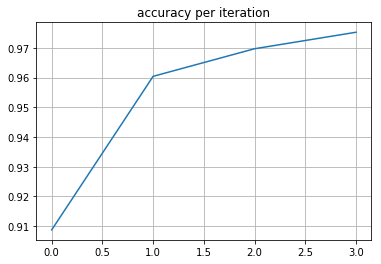

In [26]:
plt.plot(range(4),history.history['acc'])
plt.title('accuracy per iteration')
plt.grid();

In [ ]:
# Great accuracy for an ANN in so few training steps

# CNN in Keras
## 99.5% accuracy on MNIST in 12 epochs

Note this takes ~1hr to run

### 1. Data preprocessing

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# notice that we don't flatten image
input_shape = (img_rows, img_cols, 1)

#normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Model construction

In [ ]:
# Almost LeNet architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

# Model compilation

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

# Model training

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# Model evaluation

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])